In [154]:
import numpy as np
import matplotlib.pyplot as plt
# from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import pickle
import tensorflow as tf
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

np.random.seed(101)
tf.random.set_seed(101)
initializer = tf.random_normal_initializer(seed=1)

In [2]:
df = pd.read_excel(r"C:\Users\huangzh\Desktop\线性关系\模拟数据样本-外发.xlsx")
df.shape

(5602, 133)

In [3]:
df.head()

时间   数据指标1   数据指标2   数据指标3   数据指标4   数据指标5   数据指标6   数据指标7   数据指标8  \
0 2020-05-03  7980.5   199.5  7283.5  5196.3  7155.4  3730.5  3065.7  9251.0   
1 2020-05-02  1996.0  9930.2  7603.5   373.3  2939.7  7253.4  3853.0  4611.9   
2 2020-05-01  4139.7  9894.4  7846.4  5255.5  8137.4  6202.9  6727.6  8072.0   
3 2020-04-30  2182.7  8740.1  1113.1  6777.9  8261.6  7341.2  9053.2  1138.3   
4 2020-04-29  6551.5  4730.3  5515.2  7833.8  2666.7  3579.0  1396.9   285.9   

    数据指标9  ...  数据指标123  数据指标124  数据指标125  数据指标126  数据指标127  数据指标128  数据指标129  \
0  8647.4  ...   9300.8    506.2   4079.2   1108.8   8021.1   5945.7   1677.7   
1  2631.2  ...   1493.2   2170.3   7956.8   5800.1   3292.8   2794.6   1211.2   
2  1359.5  ...   3554.2   2160.2   1519.9   9457.5   4984.1   9281.2   6763.3   
3  1214.8  ...   5049.2   5743.0   2761.7   2864.7   7443.0   2482.6   9945.5   
4  1422.7  ...   7986.7   1787.4   4095.5   9853.2   3955.4   6360.0   3722.4   

   数据指标130  数据指标131  数据指标132  
0   2557.8   2844.1   9168.9  
1   2590.6   4847.8   3136.3  
2   3881.8   9229.3   2274.0  
3   9654.5   1970.3   7576.9  
4   7467.3   8736.9     65.7  

[5 rows x 133 columns]

In [4]:
df.columns

Index(['时间', '数据指标1', '数据指标2', '数据指标3', '数据指标4', '数据指标5', '数据指标6', '数据指标7',
       '数据指标8', '数据指标9',
       ...
       '数据指标123', '数据指标124', '数据指标125', '数据指标126', '数据指标127', '数据指标128',
       '数据指标129', '数据指标130', '数据指标131', '数据指标132'],
      dtype='object', length=133)

In [5]:
df.pop("时间")

0      2020-05-03
1      2020-05-02
2      2020-05-01
3      2020-04-30
4      2020-04-29
          ...    
5597   2005-01-05
5598   2005-01-04
5599   2005-01-03
5600   2005-01-02
5601   2005-01-01
Name: 时间, Length: 5602, dtype: datetime64[ns]

In [6]:
# df.iloc[0:df.index.size, 1:df.columns.size]
# data = df.to_numpy()
df.shape

(5602, 132)

In [63]:
# index_y = df.shape[1]-1
index_y = 100
X_original = df.drop(df.columns[index_y], axis=1).values
Y_train = df.iloc[:,index_y].values[:, tf.newaxis]
# X_train = np.delete(data, index_y, axis=1)
# Y_train = data[:,index_y]
print(X_original.shape)

(5602, 131)


Scatter matrix

array([[<AxesSubplot:xlabel='数据指标51', ylabel='数据指标51'>,
        <AxesSubplot:xlabel='数据指标52', ylabel='数据指标51'>,
        <AxesSubplot:xlabel='数据指标53', ylabel='数据指标51'>,
        <AxesSubplot:xlabel='数据指标54', ylabel='数据指标51'>,
        <AxesSubplot:xlabel='数据指标55', ylabel='数据指标51'>,
        <AxesSubplot:xlabel='数据指标56', ylabel='数据指标51'>,
        <AxesSubplot:xlabel='数据指标57', ylabel='数据指标51'>,
        <AxesSubplot:xlabel='数据指标58', ylabel='数据指标51'>,
        <AxesSubplot:xlabel='数据指标59', ylabel='数据指标51'>,
        <AxesSubplot:xlabel='数据指标60', ylabel='数据指标51'>],
       [<AxesSubplot:xlabel='数据指标51', ylabel='数据指标52'>,
        <AxesSubplot:xlabel='数据指标52', ylabel='数据指标52'>,
        <AxesSubplot:xlabel='数据指标53', ylabel='数据指标52'>,
        <AxesSubplot:xlabel='数据指标54', ylabel='数据指标52'>,
        <AxesSubplot:xlabel='数据指标55', ylabel='数据指标52'>,
        <AxesSubplot:xlabel='数据指标56', ylabel='数据指标52'>,
        <AxesSubplot:xlabel='数据指标57', ylabel='数据指标52'>,
        <AxesSubplot:xlabel='数据指标58', ylabel='数

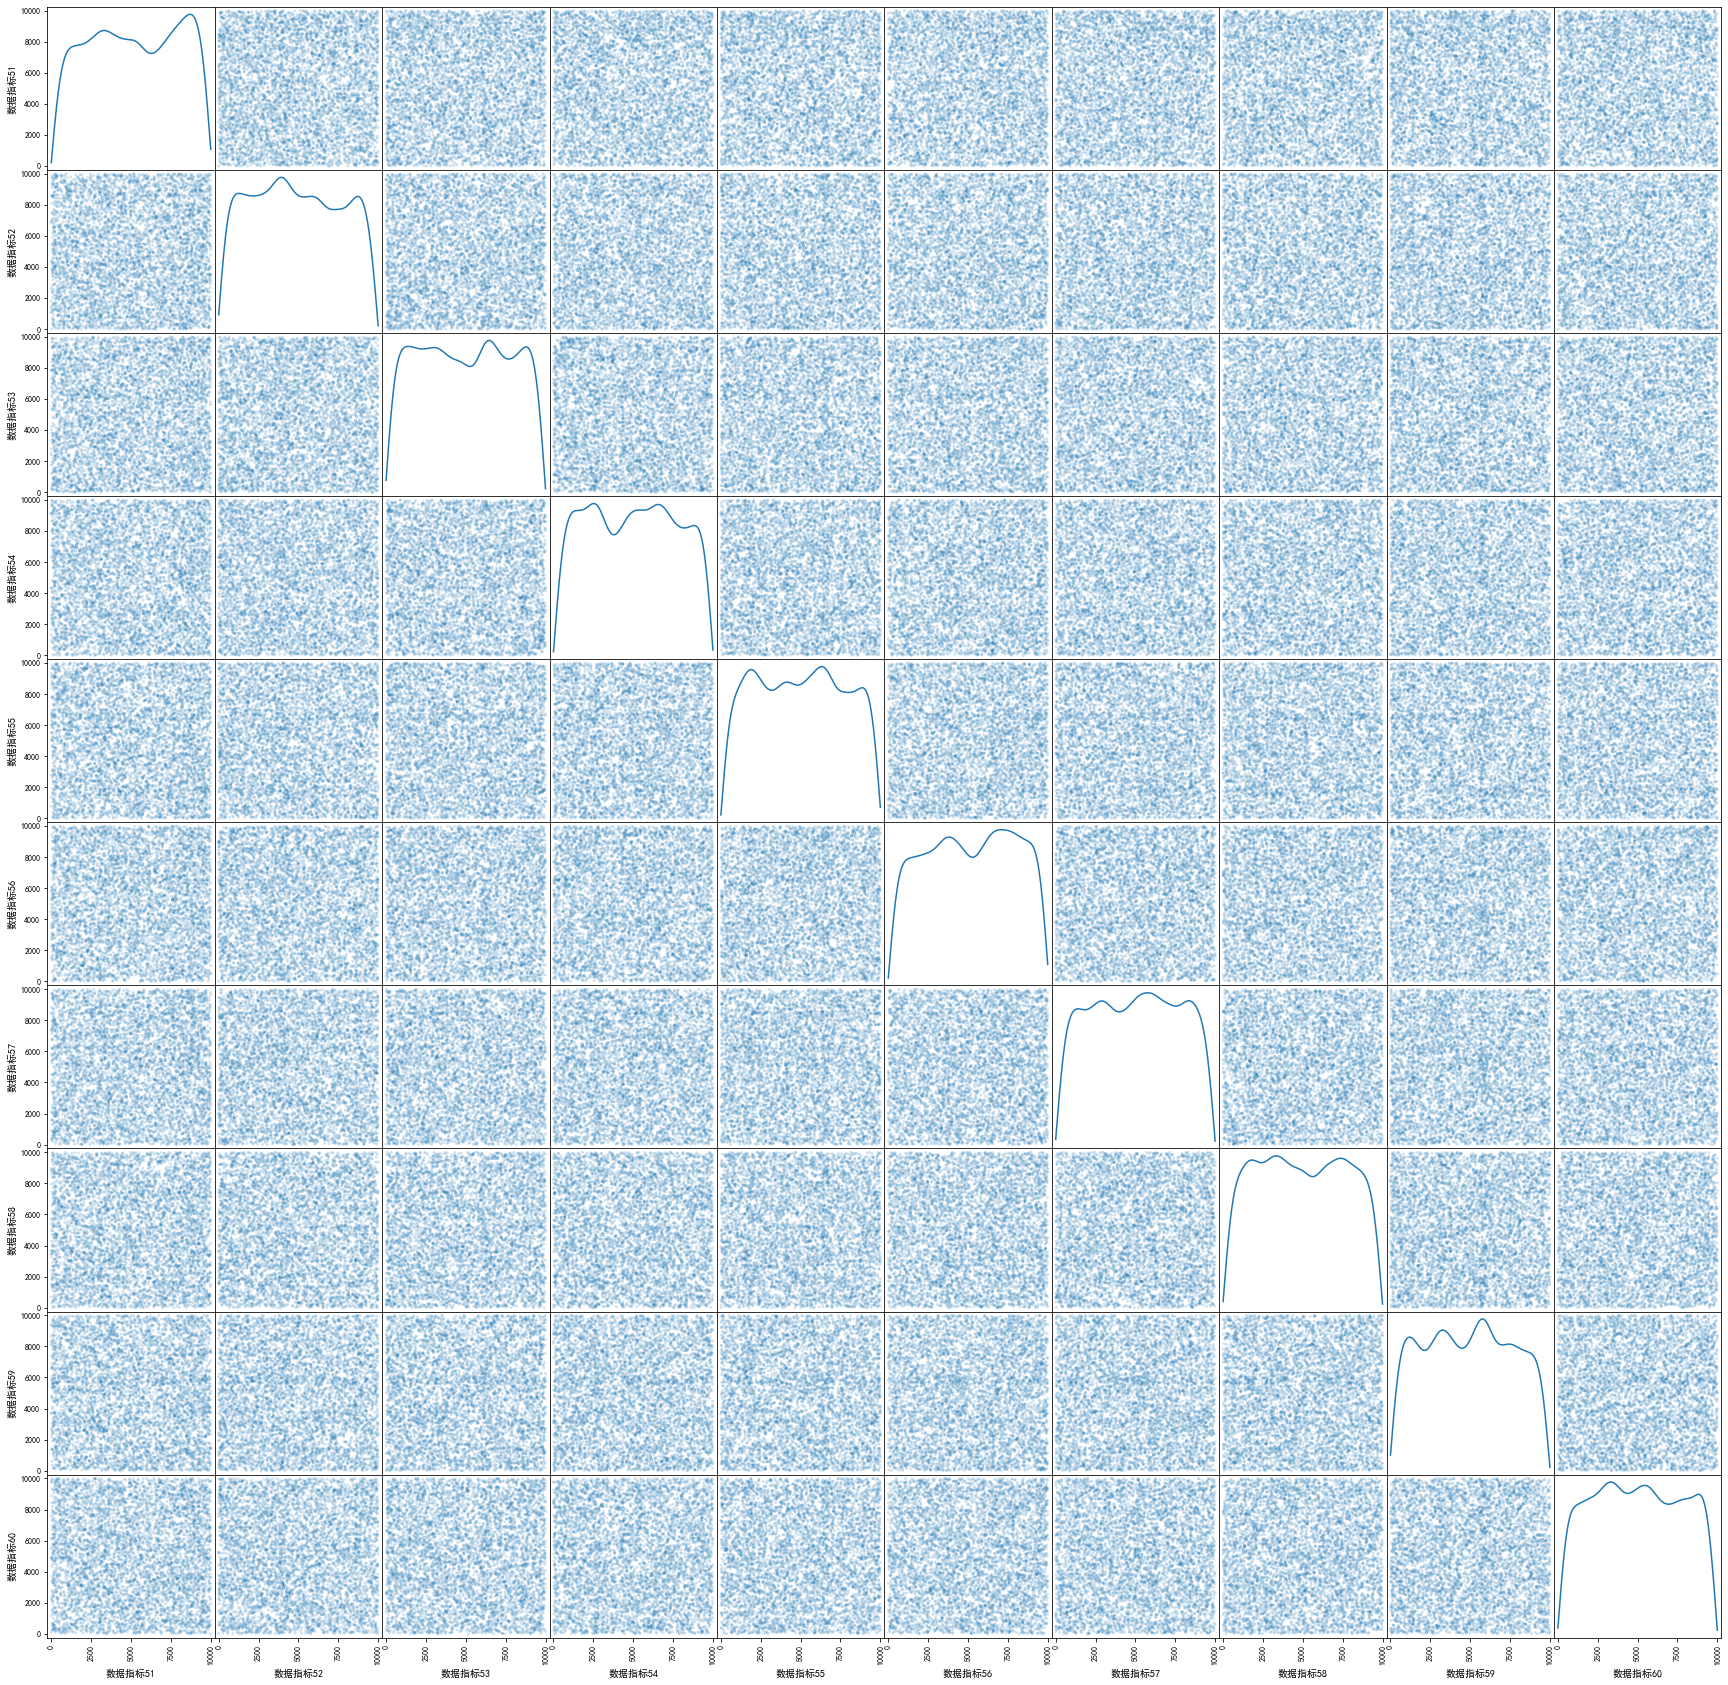

In [217]:
scatter_matrix(df.iloc[:,50:60],alpha=0.2, figsize=(30,30),diagonal='kde')

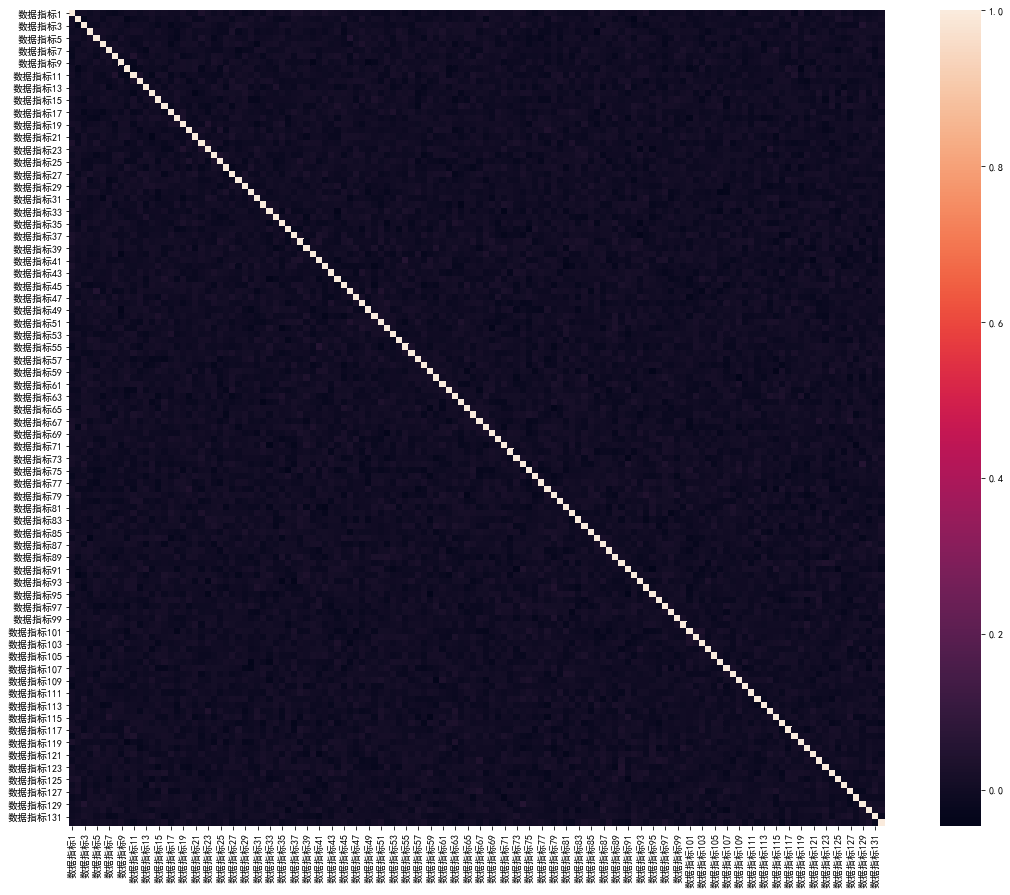

In [214]:
fig, ax = plt.subplots(figsize=(20, 15))
ax = sns.heatmap(df.corr(), square=True)

In [66]:
# X_t = np.random.random((5000, 9)) * 100
# # Y_t = (2 * np.sum(X_t[:, :1], axis=1) + 3 * np.sum(X_t[:, 2:3], axis=1))[:, tf.newaxis]
# print(X_t[:,1:2]+X_t[:,1:2])
# Y_t = 2*X_t[:, :1] * X_t[:, 2:3]+10*X_t[:,1:2]
# print(Y_t.shape)
# # Y_t = np.sum(X_t[:, :5], axis=1)[:, tf.newaxis]
# xy = np.concatenate((X_t,Y_t), axis=1)
# print(xy.shape)
# xy = pd.DataFrame(xy)
# # X_t = pd.DataFrame(X_t)
# scatter_matrix(xy,alpha=0.2, figsize=(30,30),diagonal='kde')

In [67]:
# poly = PolynomialFeatures(degree=2)
# X_train = poly.fit_transform(X_original)

# X_train = np.concatenate((X_train,1/(X_original+0.0001)),axis=1)
# X_train = 1/(X_original+0.0001)

X_train = X_original
X_train.shape

(5602, 131)

In [68]:
# with open("feature.pickle","wb") as file:
#     pickle.dump(X_train, file)

In [69]:
print("feature shape: {}".format(X_train.shape))
print(X_train)
print("\nlabel shape: {}".format(Y_train.shape))
print(Y_train)

feature shape: (5602, 131)
[[7980.5  199.5 7283.5 ... 2557.8 2844.1 9168.9]
 [1996.  9930.2 7603.5 ... 2590.6 4847.8 3136.3]
 [4139.7 9894.4 7846.4 ... 3881.8 9229.3 2274. ]
 ...
 [9575.  5874.5 2128.8 ... 3202.5 1416.1 2641.4]
 [6892.3 5556.8 5695.  ... 5007.4 9889.4 3944.1]
 [7127.6 3277.  2991.2 ... 1673.9 5246.5 8199.3]]

label shape: (5602, 1)
[[5622.6]
 [ 521.9]
 [8462.7]
 ...
 [ 907.6]
 [ 706.6]
 [7377. ]]


In [208]:
X_train = np.random.random((1000, 10)) * 10000
# Y_train = (2 * np.sum(X_train[:, :1], axis=1) + 3 * np.sum(X_train[:, 2:3], axis=1))[:, tf.newaxis]
# Y_train = np.sum(X_train[:, :5], axis=1)[:, tf.newaxis]
Y_train = X_train[:, :1] * X_train[:, 2:3] + X_train[:,4:5] / X_train[:,5:6]
poly = PolynomialFeatures(degree=2)
X_train = poly.fit_transform(X_train)
# X_train = np.concatenate((X_train, X_train1), axis=1)
# X_train = 1 / X_train

# 随机生成数据
# data = np.random.random((5602, 132)) * 10000
# X_train = np.delete(data, 131, 1)
# poly = PolynomialFeatures(degree=2)
# X_train = poly.fit_transform(X_train)
# Y_train = data[:,131:132]
# print(X_train[0])

print(X_train.shape)
print(Y_train.shape)
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.2)

(1000, 66)
(1000, 1)


In [209]:
# print([(x, y) for x, y in zip(X_train[:10], Y_train[:10])])
X_train = tf.constant(X_train, dtype=tf.float32)
Y_train = tf.constant(Y_train, dtype=tf.float32)
X_test = tf.constant(X_test, dtype=tf.float32)
Y_test = tf.constant(Y_test, dtype=tf.float32)
print(X_train.shape)
print(Y_train.shape)

num_features = X_train.shape[1]
weight = tf.Variable(np.random.random((num_features, 1)), dtype=tf.float32)
b = 0

(800, 66)
(800, 1)


In [210]:
def model(X, W, b):
    return tf.tensordot(X, W, axes=1) + b


def mean_squared_error(y, y_pred):
    # return [tf.reduce_mean(tf.square(y_pred - y)), tf.reduce_mean(tf.abs(y_pred - y))
    return tf.reduce_mean(tf.square(y_pred - y))


def loss(x, y, w, b, alpha):
    return tf.reduce_mean(tf.square(model(x, w, b) - y))
#     return tf.reduce_mean(tf.square(model(x, w, b) - y)) + alpha * tf.norm(w, ord=1)
    # return tf.reduce_mean(tf.square(model(x, w, b) - y))  # + alpha * tf.square(tf.abs(w * 2 - 1) - 1)
    # return tf.reduce_mean(tf.square(model(x, w, b) - y)) + tf.square(tf.norm(2 * w - 1)) + alpha * tf.norm(w, ord=1)


def show_learning_curve(errors_train, errors_test, axis):
    figure = plt.figure()
    ax = figure.add_subplot(1, 1, 1)
    ax.plot(axis, errors_train, color="r", label="Training mse")
    ax.plot(axis, errors_test, color="b", label="Test mse")
    ax.set_xlabel("epoch")
    ax.set_ylabel("mse")
    ax.set_title("Learning curve")
    ax.legend()
    plt.show()


def show_plot(alphas, scores):
    figure = plt.figure()
    ax = figure.add_subplot(1, 1, 1)
    ax.plot(alphas, scores)
    ax.set_xlabel(r"$\alpha$")
    ax.set_ylabel(r"mse")
    ax.set_xscale("log")
    ax.set_title("Ridge")
    plt.show()

In [211]:
num_epochs = 10000
num_samples = X_train.shape[0]
batch_size = X_train.shape[0]
learning_rate = 0.1
# alphas = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10]
# alphas.reverse()
alphas = [10]
weights = []
errors = []
errors_train = []
errors_test = []

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)

In [212]:
for alpha in alphas:
    w = tf.Variable(tf.identity(weight), dtype=tf.float32)
    print("\n{}".format(w))
    for epoch in range(num_epochs):
        # print("\nStart of epoch %d" % (epoch,))
        for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):
            with tf.GradientTape() as tape:
                tape.watch(w)
                loss_value = loss(x_batch_train, y_batch_train, w, b, alpha)
            grads = tape.gradient(loss_value, w)
            # print(grads)
            optimizer.apply_gradients(zip([grads], [w]))
            # w.assign_sub(learning_rate * grads)
            train_mse = mean_squared_error(y_batch_train, model(x_batch_train, w, b))
            test_mse = mean_squared_error(Y_test, model(X_test, w, b))
        # print(w)
        print("Training loss at epoch %d: %s" % (epoch, np.array(train_mse)))
        errors_train.append(train_mse)
        errors_test.append(test_mse)
        # print("Testing loss at epoch%d: %s" % (epoch, str(test_mse)))
        # if step % 200 == 0:
        #     print(
        #         "Training loss (for one batch) at step %d: %s"
        #         % (step, str(train_mse))
        #     )
        # print("Seen so far: %s samples" % ((step + 1) * 64))
        # print("\nepoch {}".format(epoch))
        # print("training mse: {}".format(train_mse))
        # print("test mse: {}".format(test_mse))

    print("\nalpha: {}".format(alpha))
    overall_mse = mean_squared_error(Y_train, model(X_train, w, b))
    print("training set mse: {}".format(np.array(overall_mse)))
    print("test set mse: {}".format(np.array(test_mse)))
    print("Weights: \n{}".format(w.value()))
    weights.append(w)
    errors.append(overall_mse)


<tf.Variable 'Variable:0' shape=(66, 1) dtype=float32, numpy=
array([[0.59790486],
       [0.5670843 ],
       [0.1259357 ],
       [0.2626526 ],
       [0.10875781],
       [0.67395157],
       [0.94053596],
       [0.06684326],
       [0.51989216],
       [0.17610367],
       [0.7461885 ],
       [0.04960962],
       [0.974714  ],
       [0.28128496],
       [0.39031318],
       [0.927404  ],
       [0.57028854],
       [0.81664836],
       [0.5117714 ],
       [0.98770654],
       [0.00302932],
       [0.85314846],
       [0.42577153],
       [0.83899456],
       [0.34334737],
       [0.2568892 ],
       [0.40570858],
       [0.26249987],
       [0.15797971],
       [0.4382527 ],
       [0.22081095],
       [0.4089962 ],
       [0.2584331 ],
       [0.6067743 ],
       [0.5176069 ],
       [0.86288315],
       [0.21544532],
       [0.33347374],
       [0.5236936 ],
       [0.38485557],
       [0.3257003 ],
       [0.48121923],
       [0.74439806],
       [0.64678484],
       [0.901

Training loss at epoch 184: 157347170000000.0
Training loss at epoch 185: 156368150000000.0
Training loss at epoch 186: 155393240000000.0
Training loss at epoch 187: 154422330000000.0
Training loss at epoch 188: 153455170000000.0
Training loss at epoch 189: 152491500000000.0
Training loss at epoch 190: 151531330000000.0
Training loss at epoch 191: 150574830000000.0
Training loss at epoch 192: 149622170000000.0
Training loss at epoch 193: 148673500000000.0
Training loss at epoch 194: 147728820000000.0
Training loss at epoch 195: 146788020000000.0
Training loss at epoch 196: 145851020000000.0
Training loss at epoch 197: 144917720000000.0
Training loss at epoch 198: 143988190000000.0
Training loss at epoch 199: 143062560000000.0
Training loss at epoch 200: 142140900000000.0
Training loss at epoch 201: 141223220000000.0
Training loss at epoch 202: 140309500000000.0
Training loss at epoch 203: 139399690000000.0
Training loss at epoch 204: 138493740000000.0
Training loss at epoch 205: 137591

Training loss at epoch 385: 35464434000000.0
Training loss at epoch 386: 35171718000000.0
Training loss at epoch 387: 34881204000000.0
Training loss at epoch 388: 34592875000000.0
Training loss at epoch 389: 34306720000000.0
Training loss at epoch 390: 34022734000000.0
Training loss at epoch 391: 33740888000000.0
Training loss at epoch 392: 33461178000000.0
Training loss at epoch 393: 33183590000000.0
Training loss at epoch 394: 32908109000000.0
Training loss at epoch 395: 32634726000000.0
Training loss at epoch 396: 32363420000000.0
Training loss at epoch 397: 32094183000000.0
Training loss at epoch 398: 31827004000000.0
Training loss at epoch 399: 31561863000000.0
Training loss at epoch 400: 31298748000000.0
Training loss at epoch 401: 31037650000000.0
Training loss at epoch 402: 30778558000000.0
Training loss at epoch 403: 30521450000000.0
Training loss at epoch 404: 30266318000000.0
Training loss at epoch 405: 30013154000000.0
Training loss at epoch 406: 29761940000000.0
Training l

Training loss at epoch 603: 5215782000000.0
Training loss at epoch 604: 5167996500000.0
Training loss at epoch 605: 5120630700000.0
Training loss at epoch 606: 5073681000000.0
Training loss at epoch 607: 5027147000000.0
Training loss at epoch 608: 4981021700000.0
Training loss at epoch 609: 4935303000000.0
Training loss at epoch 610: 4889987500000.0
Training loss at epoch 611: 4845071000000.0
Training loss at epoch 612: 4800551000000.0
Training loss at epoch 613: 4756425000000.0
Training loss at epoch 614: 4712687000000.0
Training loss at epoch 615: 4669337000000.0
Training loss at epoch 616: 4626369000000.0
Training loss at epoch 617: 4583782000000.0
Training loss at epoch 618: 4541571400000.0
Training loss at epoch 619: 4499732700000.0
Training loss at epoch 620: 4458266000000.0
Training loss at epoch 621: 4417164700000.0
Training loss at epoch 622: 4376428800000.0
Training loss at epoch 623: 4336052600000.0
Training loss at epoch 624: 4296035800000.0
Training loss at epoch 625: 4256

Training loss at epoch 812: 704093700000.0
Training loss at epoch 813: 697086100000.0
Training loss at epoch 814: 690145660000.0
Training loss at epoch 815: 683271300000.0
Training loss at epoch 816: 676462500000.0
Training loss at epoch 817: 669718200000.0
Training loss at epoch 818: 663038400000.0
Training loss at epoch 819: 656422000000.0
Training loss at epoch 820: 649869070000.0
Training loss at epoch 821: 643378800000.0
Training loss at epoch 822: 636949950000.0
Training loss at epoch 823: 630582940000.0
Training loss at epoch 824: 624276540000.0
Training loss at epoch 825: 618029840000.0
Training loss at epoch 826: 611843440000.0
Training loss at epoch 827: 605716300000.0
Training loss at epoch 828: 599647700000.0
Training loss at epoch 829: 593637500000.0
Training loss at epoch 830: 587684250000.0
Training loss at epoch 831: 581788240000.0
Training loss at epoch 832: 575949050000.0
Training loss at epoch 833: 570165700000.0
Training loss at epoch 834: 564438200000.0
Training lo

Training loss at epoch 1018: 80875905000.0
Training loss at epoch 1019: 79986360000.0
Training loss at epoch 1020: 79106120000.0
Training loss at epoch 1021: 78235090000.0
Training loss at epoch 1022: 77373465000.0
Training loss at epoch 1023: 76520780000.0
Training loss at epoch 1024: 75676930000.0
Training loss at epoch 1025: 74842030000.0
Training loss at epoch 1026: 74015785000.0
Training loss at epoch 1027: 73198290000.0
Training loss at epoch 1028: 72389380000.0
Training loss at epoch 1029: 71589090000.0
Training loss at epoch 1030: 70797230000.0
Training loss at epoch 1031: 70013710000.0
Training loss at epoch 1032: 69238284000.0
Training loss at epoch 1033: 68471144000.0
Training loss at epoch 1034: 67712240000.0
Training loss at epoch 1035: 66961160000.0
Training loss at epoch 1036: 66218217000.0
Training loss at epoch 1037: 65482953000.0
Training loss at epoch 1038: 64755618000.0
Training loss at epoch 1039: 64035860000.0
Training loss at epoch 1040: 63323816000.0
Training lo

Training loss at epoch 1223: 7356877000.0
Training loss at epoch 1224: 7266369500.0
Training loss at epoch 1225: 7176930000.0
Training loss at epoch 1226: 7088509000.0
Training loss at epoch 1227: 7001173000.0
Training loss at epoch 1228: 6914871300.0
Training loss at epoch 1229: 6829581300.0
Training loss at epoch 1230: 6745264000.0
Training loss at epoch 1231: 6661931000.0
Training loss at epoch 1232: 6579587600.0
Training loss at epoch 1233: 6498264600.0
Training loss at epoch 1234: 6417852400.0
Training loss at epoch 1235: 6338429400.0
Training loss at epoch 1236: 6259920000.0
Training loss at epoch 1237: 6182343000.0
Training loss at epoch 1238: 6105661000.0
Training loss at epoch 1239: 6029909500.0
Training loss at epoch 1240: 5955066400.0
Training loss at epoch 1241: 5881077000.0
Training loss at epoch 1242: 5807999500.0
Training loss at epoch 1243: 5735775700.0
Training loss at epoch 1244: 5664421400.0
Training loss at epoch 1245: 5593877500.0
Training loss at epoch 1246: 55242

Training loss at epoch 1427: 504684540.0
Training loss at epoch 1428: 497708480.0
Training loss at epoch 1429: 490807780.0
Training loss at epoch 1430: 484010900.0
Training loss at epoch 1431: 477296900.0
Training loss at epoch 1432: 470683780.0
Training loss at epoch 1433: 464143070.0
Training loss at epoch 1434: 457696450.0
Training loss at epoch 1435: 451339840.0
Training loss at epoch 1436: 445067970.0
Training loss at epoch 1437: 438871500.0
Training loss at epoch 1438: 432763740.0
Training loss at epoch 1439: 426733000.0
Training loss at epoch 1440: 420787840.0
Training loss at epoch 1441: 414925340.0
Training loss at epoch 1442: 409133020.0
Training loss at epoch 1443: 403430100.0
Training loss at epoch 1444: 397781980.0
Training loss at epoch 1445: 392228830.0
Training loss at epoch 1446: 386744900.0
Training loss at epoch 1447: 381331780.0
Training loss at epoch 1448: 375990000.0
Training loss at epoch 1449: 370723650.0
Training loss at epoch 1450: 365525300.0
Training loss at

Training loss at epoch 1635: 23388708.0
Training loss at epoch 1636: 23027830.0
Training loss at epoch 1637: 22672536.0
Training loss at epoch 1638: 22324286.0
Training loss at epoch 1639: 21980242.0
Training loss at epoch 1640: 21640564.0
Training loss at epoch 1641: 21305832.0
Training loss at epoch 1642: 20977954.0
Training loss at epoch 1643: 20652194.0
Training loss at epoch 1644: 20334978.0
Training loss at epoch 1645: 20021356.0
Training loss at epoch 1646: 19709766.0
Training loss at epoch 1647: 19407252.0
Training loss at epoch 1648: 19109982.0
Training loss at epoch 1649: 18812758.0
Training loss at epoch 1650: 18523846.0
Training loss at epoch 1651: 18235710.0
Training loss at epoch 1652: 17952802.0
Training loss at epoch 1653: 17675546.0
Training loss at epoch 1654: 17402532.0
Training loss at epoch 1655: 17133022.0
Training loss at epoch 1656: 16865970.0
Training loss at epoch 1657: 16605586.0
Training loss at epoch 1658: 16348966.0
Training loss at epoch 1659: 16095506.0


Training loss at epoch 1876: 807238.2
Training loss at epoch 1877: 800171.44
Training loss at epoch 1878: 793420.4
Training loss at epoch 1879: 786946.56
Training loss at epoch 1880: 780534.4
Training loss at epoch 1881: 773867.6
Training loss at epoch 1882: 767584.5
Training loss at epoch 1883: 761370.5
Training loss at epoch 1884: 755427.25
Training loss at epoch 1885: 749311.25
Training loss at epoch 1886: 743268.9
Training loss at epoch 1887: 737708.3
Training loss at epoch 1888: 731923.8
Training loss at epoch 1889: 726714.75
Training loss at epoch 1890: 721369.7
Training loss at epoch 1891: 715816.0
Training loss at epoch 1892: 710186.25
Training loss at epoch 1893: 705228.56
Training loss at epoch 1894: 699884.8
Training loss at epoch 1895: 695187.2
Training loss at epoch 1896: 690144.0
Training loss at epoch 1897: 685348.5
Training loss at epoch 1898: 681062.56
Training loss at epoch 1899: 676048.8
Training loss at epoch 1900: 671633.6
Training loss at epoch 1901: 667241.4
Trai

Training loss at epoch 2122: 430968.3
Training loss at epoch 2123: 430862.12
Training loss at epoch 2124: 430593.72
Training loss at epoch 2125: 430698.8
Training loss at epoch 2126: 430748.88
Training loss at epoch 2127: 430551.47
Training loss at epoch 2128: 430355.38
Training loss at epoch 2129: 430320.25
Training loss at epoch 2130: 430326.84
Training loss at epoch 2131: 430283.9
Training loss at epoch 2132: 430241.2
Training loss at epoch 2133: 430125.53
Training loss at epoch 2134: 430141.0
Training loss at epoch 2135: 430071.03
Training loss at epoch 2136: 429992.3
Training loss at epoch 2137: 429849.38
Training loss at epoch 2138: 430010.28
Training loss at epoch 2139: 429831.97
Training loss at epoch 2140: 429942.56
Training loss at epoch 2141: 429799.53
Training loss at epoch 2142: 429956.56
Training loss at epoch 2143: 429780.97
Training loss at epoch 2144: 429819.03
Training loss at epoch 2145: 429797.84
Training loss at epoch 2146: 429691.88
Training loss at epoch 2147: 42

Training loss at epoch 2344: 427402.3
Training loss at epoch 2345: 427407.97
Training loss at epoch 2346: 427390.56
Training loss at epoch 2347: 427359.9
Training loss at epoch 2348: 427375.97
Training loss at epoch 2349: 427430.97
Training loss at epoch 2350: 427430.16
Training loss at epoch 2351: 427356.3
Training loss at epoch 2352: 427283.7
Training loss at epoch 2353: 427342.2
Training loss at epoch 2354: 427350.62
Training loss at epoch 2355: 427407.9
Training loss at epoch 2356: 427437.28
Training loss at epoch 2357: 427437.2
Training loss at epoch 2358: 427430.25
Training loss at epoch 2359: 427408.75
Training loss at epoch 2360: 427413.53
Training loss at epoch 2361: 427448.4
Training loss at epoch 2362: 427441.7
Training loss at epoch 2363: 427401.28
Training loss at epoch 2364: 427353.9
Training loss at epoch 2365: 427364.62
Training loss at epoch 2366: 427396.0
Training loss at epoch 2367: 427319.38
Training loss at epoch 2368: 427336.16
Training loss at epoch 2369: 427363.

Training loss at epoch 2585: 427027.75
Training loss at epoch 2586: 426991.38
Training loss at epoch 2587: 426999.12
Training loss at epoch 2588: 427032.97
Training loss at epoch 2589: 427035.38
Training loss at epoch 2590: 427047.47
Training loss at epoch 2591: 427030.0
Training loss at epoch 2592: 427073.44
Training loss at epoch 2593: 427096.97
Training loss at epoch 2594: 427065.38
Training loss at epoch 2595: 427193.2
Training loss at epoch 2596: 427094.0
Training loss at epoch 2597: 427174.47
Training loss at epoch 2598: 427170.88
Training loss at epoch 2599: 427207.7
Training loss at epoch 2600: 427156.97
Training loss at epoch 2601: 427103.8
Training loss at epoch 2602: 427017.75
Training loss at epoch 2603: 427118.0
Training loss at epoch 2604: 427131.53
Training loss at epoch 2605: 427043.2
Training loss at epoch 2606: 426992.8
Training loss at epoch 2607: 427053.75
Training loss at epoch 2608: 427033.44
Training loss at epoch 2609: 426941.84
Training loss at epoch 2610: 4268

Training loss at epoch 2817: 426363.7
Training loss at epoch 2818: 426396.97
Training loss at epoch 2819: 426322.3
Training loss at epoch 2820: 426257.7
Training loss at epoch 2821: 426283.84
Training loss at epoch 2822: 426361.28
Training loss at epoch 2823: 426300.84
Training loss at epoch 2824: 426267.28
Training loss at epoch 2825: 426280.88
Training loss at epoch 2826: 426270.97
Training loss at epoch 2827: 426290.3
Training loss at epoch 2828: 426255.9
Training loss at epoch 2829: 426258.56
Training loss at epoch 2830: 426313.6
Training loss at epoch 2831: 426326.38
Training loss at epoch 2832: 426309.47
Training loss at epoch 2833: 426358.44
Training loss at epoch 2834: 426369.1
Training loss at epoch 2835: 426381.16
Training loss at epoch 2836: 426357.25
Training loss at epoch 2837: 426394.12
Training loss at epoch 2838: 426366.8
Training loss at epoch 2839: 426386.28
Training loss at epoch 2840: 426364.97
Training loss at epoch 2841: 426374.88
Training loss at epoch 2842: 4263

Training loss at epoch 3058: 425878.84
Training loss at epoch 3059: 425876.25
Training loss at epoch 3060: 425859.25
Training loss at epoch 3061: 425865.1
Training loss at epoch 3062: 425865.72
Training loss at epoch 3063: 425854.0
Training loss at epoch 3064: 425866.62
Training loss at epoch 3065: 425849.38
Training loss at epoch 3066: 425849.84
Training loss at epoch 3067: 425839.7
Training loss at epoch 3068: 425878.16
Training loss at epoch 3069: 425890.84
Training loss at epoch 3070: 425857.2
Training loss at epoch 3071: 425864.44
Training loss at epoch 3072: 425865.38
Training loss at epoch 3073: 425867.47
Training loss at epoch 3074: 425852.88
Training loss at epoch 3075: 425841.6
Training loss at epoch 3076: 425859.3
Training loss at epoch 3077: 425856.97
Training loss at epoch 3078: 425847.44
Training loss at epoch 3079: 425847.56
Training loss at epoch 3080: 425867.53
Training loss at epoch 3081: 425890.97
Training loss at epoch 3082: 425886.03
Training loss at epoch 3083: 42

Training loss at epoch 3303: 425339.7
Training loss at epoch 3304: 425307.38
Training loss at epoch 3305: 425338.1
Training loss at epoch 3306: 425335.53
Training loss at epoch 3307: 425319.75
Training loss at epoch 3308: 425350.47
Training loss at epoch 3309: 425366.16
Training loss at epoch 3310: 425384.97
Training loss at epoch 3311: 425393.84
Training loss at epoch 3312: 425391.72
Training loss at epoch 3313: 425400.9
Training loss at epoch 3314: 425414.38
Training loss at epoch 3315: 425446.88
Training loss at epoch 3316: 425468.0
Training loss at epoch 3317: 425446.12
Training loss at epoch 3318: 425407.75
Training loss at epoch 3319: 425401.38
Training loss at epoch 3320: 425390.8
Training loss at epoch 3321: 425331.8
Training loss at epoch 3322: 425335.72
Training loss at epoch 3323: 425361.75
Training loss at epoch 3324: 425312.97
Training loss at epoch 3325: 425299.0
Training loss at epoch 3326: 425325.7
Training loss at epoch 3327: 425286.1
Training loss at epoch 3328: 42527

Training loss at epoch 3545: 424476.97
Training loss at epoch 3546: 424458.25
Training loss at epoch 3547: 424418.56
Training loss at epoch 3548: 424486.0
Training loss at epoch 3549: 424555.12
Training loss at epoch 3550: 424459.88
Training loss at epoch 3551: 424460.47
Training loss at epoch 3552: 424504.25
Training loss at epoch 3553: 424423.38
Training loss at epoch 3554: 424424.88
Training loss at epoch 3555: 424477.84
Training loss at epoch 3556: 424510.4
Training loss at epoch 3557: 424466.25
Training loss at epoch 3558: 424443.16
Training loss at epoch 3559: 424563.75
Training loss at epoch 3560: 424501.25
Training loss at epoch 3561: 424501.16
Training loss at epoch 3562: 424470.25
Training loss at epoch 3563: 424429.9
Training loss at epoch 3564: 424429.7
Training loss at epoch 3565: 424388.62
Training loss at epoch 3566: 424359.84
Training loss at epoch 3567: 424366.88
Training loss at epoch 3568: 424428.1
Training loss at epoch 3569: 424394.16
Training loss at epoch 3570: 4

Training loss at epoch 3787: 423840.44
Training loss at epoch 3788: 423779.2
Training loss at epoch 3789: 423763.9
Training loss at epoch 3790: 423851.6
Training loss at epoch 3791: 423836.38
Training loss at epoch 3792: 423851.53
Training loss at epoch 3793: 423782.44
Training loss at epoch 3794: 423837.12
Training loss at epoch 3795: 423839.38
Training loss at epoch 3796: 423793.75
Training loss at epoch 3797: 423799.25
Training loss at epoch 3798: 423808.72
Training loss at epoch 3799: 423819.2
Training loss at epoch 3800: 423817.44
Training loss at epoch 3801: 423777.8
Training loss at epoch 3802: 423736.3
Training loss at epoch 3803: 423749.9
Training loss at epoch 3804: 423720.1
Training loss at epoch 3805: 423720.25
Training loss at epoch 3806: 423742.62
Training loss at epoch 3807: 423784.0
Training loss at epoch 3808: 423755.1
Training loss at epoch 3809: 423793.7
Training loss at epoch 3810: 423700.0
Training loss at epoch 3811: 423700.4
Training loss at epoch 3812: 423725.38

Training loss at epoch 4026: 422847.75
Training loss at epoch 4027: 422833.47
Training loss at epoch 4028: 422855.53
Training loss at epoch 4029: 422837.84
Training loss at epoch 4030: 422860.62
Training loss at epoch 4031: 422821.53
Training loss at epoch 4032: 422859.7
Training loss at epoch 4033: 422828.2
Training loss at epoch 4034: 422830.12
Training loss at epoch 4035: 422822.03
Training loss at epoch 4036: 422794.8
Training loss at epoch 4037: 422856.0
Training loss at epoch 4038: 422807.4
Training loss at epoch 4039: 422860.4
Training loss at epoch 4040: 422819.44
Training loss at epoch 4041: 422795.44
Training loss at epoch 4042: 422769.88
Training loss at epoch 4043: 422804.4
Training loss at epoch 4044: 422766.16
Training loss at epoch 4045: 422789.16
Training loss at epoch 4046: 422779.62
Training loss at epoch 4047: 422742.84
Training loss at epoch 4048: 422781.47
Training loss at epoch 4049: 422768.25
Training loss at epoch 4050: 422816.9
Training loss at epoch 4051: 4227

Training loss at epoch 4262: 422065.53
Training loss at epoch 4263: 422069.2
Training loss at epoch 4264: 422016.7
Training loss at epoch 4265: 422060.4
Training loss at epoch 4266: 422081.38
Training loss at epoch 4267: 421975.44
Training loss at epoch 4268: 422045.6
Training loss at epoch 4269: 422090.3
Training loss at epoch 4270: 421991.47
Training loss at epoch 4271: 422042.8
Training loss at epoch 4272: 422085.9
Training loss at epoch 4273: 421921.7
Training loss at epoch 4274: 422003.12
Training loss at epoch 4275: 422040.62
Training loss at epoch 4276: 421946.1
Training loss at epoch 4277: 422068.1
Training loss at epoch 4278: 421962.88
Training loss at epoch 4279: 421954.88
Training loss at epoch 4280: 422034.7
Training loss at epoch 4281: 421957.12
Training loss at epoch 4282: 421959.62
Training loss at epoch 4283: 421961.28
Training loss at epoch 4284: 421893.2
Training loss at epoch 4285: 421991.25
Training loss at epoch 4286: 421913.84
Training loss at epoch 4287: 421919.0

Training loss at epoch 4474: 421032.97
Training loss at epoch 4475: 421037.97
Training loss at epoch 4476: 421016.25
Training loss at epoch 4477: 420997.6
Training loss at epoch 4478: 420942.75
Training loss at epoch 4479: 420968.1
Training loss at epoch 4480: 420955.03
Training loss at epoch 4481: 420897.9
Training loss at epoch 4482: 420968.8
Training loss at epoch 4483: 420948.12
Training loss at epoch 4484: 420863.38
Training loss at epoch 4485: 420924.72
Training loss at epoch 4486: 420903.53
Training loss at epoch 4487: 420923.47
Training loss at epoch 4488: 420932.16
Training loss at epoch 4489: 420912.16
Training loss at epoch 4490: 420890.62
Training loss at epoch 4491: 420855.7
Training loss at epoch 4492: 420823.38
Training loss at epoch 4493: 420818.2
Training loss at epoch 4494: 420858.56
Training loss at epoch 4495: 420794.4
Training loss at epoch 4496: 420850.47
Training loss at epoch 4497: 420836.12
Training loss at epoch 4498: 420873.62
Training loss at epoch 4499: 420

Training loss at epoch 4687: 98461600000.0
Training loss at epoch 4688: 177270920000.0
Training loss at epoch 4689: 321048300000.0
Training loss at epoch 4690: 584829760000.0
Training loss at epoch 4691: 1071441300000.0
Training loss at epoch 4692: 1973876400000.0
Training loss at epoch 4693: 3655765300000.0
Training loss at epoch 4694: 6804029300000.0
Training loss at epoch 4695: 12716590000000.0
Training loss at epoch 4696: 23835575000000.0
Training loss at epoch 4697: 44697746000000.0
Training loss at epoch 4698: 83484170000000.0
Training loss at epoch 4699: 154012610000000.0
Training loss at epoch 4700: 276343550000000.0
Training loss at epoch 4701: 469034720000000.0
Training loss at epoch 4702: 717686350000000.0
Training loss at epoch 4703: 915666400000000.0
Training loss at epoch 4704: 863796600000000.0
Training loss at epoch 4705: 490874870000000.0
Training loss at epoch 4706: 88538385000000.0
Training loss at epoch 4707: 24715658000000.0
Training loss at epoch 4708: 26717716000

Training loss at epoch 4898: 1565794.9
Training loss at epoch 4899: 1804801.6
Training loss at epoch 4900: 1464768.6
Training loss at epoch 4901: 865611.25
Training loss at epoch 4902: 463346.56
Training loss at epoch 4903: 479323.28
Training loss at epoch 4904: 783407.7
Training loss at epoch 4905: 1065350.5
Training loss at epoch 4906: 1096290.1
Training loss at epoch 4907: 876801.75
Training loss at epoch 4908: 588230.25
Training loss at epoch 4909: 427532.8
Training loss at epoch 4910: 463869.16
Training loss at epoch 4911: 615475.75
Training loss at epoch 4912: 740063.94
Training loss at epoch 4913: 744986.06
Training loss at epoch 4914: 640051.94
Training loss at epoch 4915: 504441.38
Training loss at epoch 4916: 425163.25
Training loss at epoch 4917: 435866.1
Training loss at epoch 4918: 505491.84
Training loss at epoch 4919: 572679.25
Training loss at epoch 4920: 587908.4
Training loss at epoch 4921: 545351.7
Training loss at epoch 4922: 478508.88
Training loss at epoch 4923: 4

Training loss at epoch 5144: 98972920000000.0
Training loss at epoch 5145: 1013382100000000.0
Training loss at epoch 5146: 1081471400000000.0
Training loss at epoch 5147: 159496060000000.0
Training loss at epoch 5148: 203145380000000.0
Training loss at epoch 5149: 805801300000000.0
Training loss at epoch 5150: 410573740000000.0
Training loss at epoch 5151: 6295539000000.0
Training loss at epoch 5152: 443346800000000.0
Training loss at epoch 5153: 440939760000000.0
Training loss at epoch 5154: 14925765000000.0
Training loss at epoch 5155: 217867330000000.0
Training loss at epoch 5156: 367843680000000.0
Training loss at epoch 5157: 47601080000000.0
Training loss at epoch 5158: 101432290000000.0
Training loss at epoch 5159: 277316240000000.0
Training loss at epoch 5160: 65273220000000.0
Training loss at epoch 5161: 45247715000000.0
Training loss at epoch 5162: 199613120000000.0
Training loss at epoch 5163: 68505597000000.0
Training loss at epoch 5164: 18999906000000.0
Training loss at epo

Training loss at epoch 5350: 648221.94
Training loss at epoch 5351: 977712.06
Training loss at epoch 5352: 668920.6
Training loss at epoch 5353: 419308.88
Training loss at epoch 5354: 677690.56
Training loss at epoch 5355: 772959.2
Training loss at epoch 5356: 500390.44
Training loss at epoch 5357: 447137.38
Training loss at epoch 5358: 646418.6
Training loss at epoch 5359: 615044.4
Training loss at epoch 5360: 434021.38
Training loss at epoch 5361: 472137.12
Training loss at epoch 5362: 587879.75
Training loss at epoch 5363: 513815.38
Training loss at epoch 5364: 417346.97
Training loss at epoch 5365: 480657.84
Training loss at epoch 5366: 533589.44
Training loss at epoch 5367: 459843.53
Training loss at epoch 5368: 418621.53
Training loss at epoch 5369: 474602.3
Training loss at epoch 5370: 489114.88
Training loss at epoch 5371: 433195.2
Training loss at epoch 5372: 423345.28
Training loss at epoch 5373: 464299.8
Training loss at epoch 5374: 459836.4
Training loss at epoch 5375: 4220

Training loss at epoch 5562: 416139.12
Training loss at epoch 5563: 416140.72
Training loss at epoch 5564: 416143.6
Training loss at epoch 5565: 416179.38
Training loss at epoch 5566: 416092.97
Training loss at epoch 5567: 416121.97
Training loss at epoch 5568: 416140.75
Training loss at epoch 5569: 416123.03
Training loss at epoch 5570: 416173.03
Training loss at epoch 5571: 416067.12
Training loss at epoch 5572: 416108.0
Training loss at epoch 5573: 416081.56
Training loss at epoch 5574: 416089.16
Training loss at epoch 5575: 416079.72
Training loss at epoch 5576: 416067.1
Training loss at epoch 5577: 416046.84
Training loss at epoch 5578: 416069.53
Training loss at epoch 5579: 416058.16
Training loss at epoch 5580: 416064.4
Training loss at epoch 5581: 416100.25
Training loss at epoch 5582: 416042.9
Training loss at epoch 5583: 416041.3
Training loss at epoch 5584: 415999.47
Training loss at epoch 5585: 416034.4
Training loss at epoch 5586: 416018.1
Training loss at epoch 5587: 4159

Training loss at epoch 5777: 415112.28
Training loss at epoch 5778: 415125.12
Training loss at epoch 5779: 415141.62
Training loss at epoch 5780: 415125.28
Training loss at epoch 5781: 415026.62
Training loss at epoch 5782: 415127.4
Training loss at epoch 5783: 415082.56
Training loss at epoch 5784: 415081.25
Training loss at epoch 5785: 415049.3
Training loss at epoch 5786: 415003.88
Training loss at epoch 5787: 415050.0
Training loss at epoch 5788: 415094.3
Training loss at epoch 5789: 415053.25
Training loss at epoch 5790: 415038.72
Training loss at epoch 5791: 415105.62
Training loss at epoch 5792: 415054.38
Training loss at epoch 5793: 415123.44
Training loss at epoch 5794: 415044.84
Training loss at epoch 5795: 415170.4
Training loss at epoch 5796: 415052.4
Training loss at epoch 5797: 415128.75
Training loss at epoch 5798: 415048.88
Training loss at epoch 5799: 415088.62
Training loss at epoch 5800: 415021.25
Training loss at epoch 5801: 415066.8
Training loss at epoch 5802: 414

Training loss at epoch 5984: 812071200.0
Training loss at epoch 5985: 319773660.0
Training loss at epoch 5986: 16782630.0
Training loss at epoch 5987: 440992770.0
Training loss at epoch 5988: 475774560.0
Training loss at epoch 5989: 57639044.0
Training loss at epoch 5990: 109325970.0
Training loss at epoch 5991: 381048350.0
Training loss at epoch 5992: 207065310.0
Training loss at epoch 5993: 414980.9
Training loss at epoch 5994: 168858560.0
Training loss at epoch 5995: 251672930.0
Training loss at epoch 5996: 60123864.0
Training loss at epoch 5997: 23422100.0
Training loss at epoch 5998: 165482420.0
Training loss at epoch 5999: 132162210.0
Training loss at epoch 6000: 6974943.5
Training loss at epoch 6001: 51938450.0
Training loss at epoch 6002: 125066056.0
Training loss at epoch 6003: 54198980.0
Training loss at epoch 6004: 1370595.5
Training loss at epoch 6005: 61494830.0
Training loss at epoch 6006: 78109360.0
Training loss at epoch 6007: 15701471.0
Training loss at epoch 6008: 987

Training loss at epoch 6220: 413207.28
Training loss at epoch 6221: 413168.47
Training loss at epoch 6222: 413164.16
Training loss at epoch 6223: 413207.84
Training loss at epoch 6224: 413177.44
Training loss at epoch 6225: 413223.53
Training loss at epoch 6226: 413164.56
Training loss at epoch 6227: 413214.38
Training loss at epoch 6228: 413168.25
Training loss at epoch 6229: 413193.1
Training loss at epoch 6230: 413139.97
Training loss at epoch 6231: 413179.38
Training loss at epoch 6232: 413181.75
Training loss at epoch 6233: 413191.97
Training loss at epoch 6234: 413135.72
Training loss at epoch 6235: 413148.47
Training loss at epoch 6236: 413090.47
Training loss at epoch 6237: 413123.97
Training loss at epoch 6238: 413086.03
Training loss at epoch 6239: 413095.12
Training loss at epoch 6240: 413042.4
Training loss at epoch 6241: 413072.97
Training loss at epoch 6242: 413040.12
Training loss at epoch 6243: 413020.72
Training loss at epoch 6244: 412976.1
Training loss at epoch 6245:

Training loss at epoch 6451: 1284583.6
Training loss at epoch 6452: 2041827.5
Training loss at epoch 6453: 3479739.5
Training loss at epoch 6454: 6214532.5
Training loss at epoch 6455: 11443304.0
Training loss at epoch 6456: 21488286.0
Training loss at epoch 6457: 40886330.0
Training loss at epoch 6458: 78541580.0
Training loss at epoch 6459: 152003230.0
Training loss at epoch 6460: 296082000.0
Training loss at epoch 6461: 580080060.0
Training loss at epoch 6462: 1142882200.0
Training loss at epoch 6463: 2263945700.0
Training loss at epoch 6464: 4508524000.0
Training loss at epoch 6465: 9025800000.0
Training loss at epoch 6466: 18162113000.0
Training loss at epoch 6467: 36731613000.0
Training loss at epoch 6468: 74661260000.0
Training loss at epoch 6469: 152519070000.0
Training loss at epoch 6470: 313118000000.0
Training loss at epoch 6471: 645979100000.0
Training loss at epoch 6472: 1339101800000.0
Training loss at epoch 6473: 2788839000000.0
Training loss at epoch 6474: 5833323000000

Training loss at epoch 6659: 2709681.0
Training loss at epoch 6660: 1204012.9
Training loss at epoch 6661: 7485412.0
Training loss at epoch 6662: 9847396.0
Training loss at epoch 6663: 4754658.0
Training loss at epoch 6664: 487324.1
Training loss at epoch 6665: 2581686.5
Training loss at epoch 6666: 6186222.5
Training loss at epoch 6667: 5223122.5
Training loss at epoch 6668: 1519622.1
Training loss at epoch 6669: 595604.9
Training loss at epoch 6670: 2903030.5
Training loss at epoch 6671: 4158155.2
Training loss at epoch 6672: 2455041.0
Training loss at epoch 6673: 544520.6
Training loss at epoch 6674: 970594.8
Training loss at epoch 6675: 2466798.5
Training loss at epoch 6676: 2508760.2
Training loss at epoch 6677: 1143467.9
Training loss at epoch 6678: 412386.0
Training loss at epoch 6679: 1086109.1
Training loss at epoch 6680: 1829279.6
Training loss at epoch 6681: 1477285.2
Training loss at epoch 6682: 629602.0
Training loss at epoch 6683: 464846.72
Training loss at epoch 6684: 99

Training loss at epoch 6875: 410249.03
Training loss at epoch 6876: 410259.12
Training loss at epoch 6877: 410236.47
Training loss at epoch 6878: 410256.28
Training loss at epoch 6879: 410258.25
Training loss at epoch 6880: 410282.62
Training loss at epoch 6881: 410254.56
Training loss at epoch 6882: 410287.84
Training loss at epoch 6883: 410271.38
Training loss at epoch 6884: 410313.44
Training loss at epoch 6885: 410288.16
Training loss at epoch 6886: 410312.28
Training loss at epoch 6887: 410291.0
Training loss at epoch 6888: 410242.72
Training loss at epoch 6889: 410278.3
Training loss at epoch 6890: 410307.75
Training loss at epoch 6891: 410287.75
Training loss at epoch 6892: 410259.9
Training loss at epoch 6893: 410224.47
Training loss at epoch 6894: 410293.75
Training loss at epoch 6895: 410133.47
Training loss at epoch 6896: 410286.38
Training loss at epoch 6897: 410203.6
Training loss at epoch 6898: 410206.28
Training loss at epoch 6899: 410160.25
Training loss at epoch 6900: 

Training loss at epoch 7091: 2199960700000.0
Training loss at epoch 7092: 2840998700000.0
Training loss at epoch 7093: 207396630000.0
Training loss at epoch 7094: 1067499100000.0
Training loss at epoch 7095: 2282571700000.0
Training loss at epoch 7096: 464276100000.0
Training loss at epoch 7097: 400138800000.0
Training loss at epoch 7098: 1664526300000.0
Training loss at epoch 7099: 659788700000.0
Training loss at epoch 7100: 84423060000.0
Training loss at epoch 7101: 1088809300000.0
Training loss at epoch 7102: 740505550000.0
Training loss at epoch 7103: 167043660.0
Training loss at epoch 7104: 622177700000.0
Training loss at epoch 7105: 705777240000.0
Training loss at epoch 7106: 39251145000.0
Training loss at epoch 7107: 293724800000.0
Training loss at epoch 7108: 586753440000.0
Training loss at epoch 7109: 118077080000.0
Training loss at epoch 7110: 99962070000.0
Training loss at epoch 7111: 427205430000.0
Training loss at epoch 7112: 183037540000.0
Training loss at epoch 7113: 147

Training loss at epoch 7305: 408864.03
Training loss at epoch 7306: 409080.0
Training loss at epoch 7307: 408647.75
Training loss at epoch 7308: 408372.88
Training loss at epoch 7309: 408668.62
Training loss at epoch 7310: 408828.47
Training loss at epoch 7311: 408645.28
Training loss at epoch 7312: 408400.3
Training loss at epoch 7313: 408762.9
Training loss at epoch 7314: 408609.44
Training loss at epoch 7315: 408641.38
Training loss at epoch 7316: 408384.97
Training loss at epoch 7317: 408570.56
Training loss at epoch 7318: 408685.28
Training loss at epoch 7319: 408425.7
Training loss at epoch 7320: 408288.88
Training loss at epoch 7321: 408504.62
Training loss at epoch 7322: 408530.44
Training loss at epoch 7323: 408475.62
Training loss at epoch 7324: 408214.7
Training loss at epoch 7325: 408407.56
Training loss at epoch 7326: 408461.28
Training loss at epoch 7327: 408401.28
Training loss at epoch 7328: 408202.9
Training loss at epoch 7329: 408163.28
Training loss at epoch 7330: 40

Training loss at epoch 7519: 407524.16
Training loss at epoch 7520: 407547.84
Training loss at epoch 7521: 407429.38
Training loss at epoch 7522: 407489.84
Training loss at epoch 7523: 407522.4
Training loss at epoch 7524: 407425.28
Training loss at epoch 7525: 407518.1
Training loss at epoch 7526: 407400.0
Training loss at epoch 7527: 407396.47
Training loss at epoch 7528: 407490.88
Training loss at epoch 7529: 407401.28
Training loss at epoch 7530: 407423.84
Training loss at epoch 7531: 407377.28
Training loss at epoch 7532: 407402.0
Training loss at epoch 7533: 407337.16
Training loss at epoch 7534: 407318.25
Training loss at epoch 7535: 407335.9
Training loss at epoch 7536: 407314.0
Training loss at epoch 7537: 407335.53
Training loss at epoch 7538: 407325.1
Training loss at epoch 7539: 407350.47
Training loss at epoch 7540: 407261.2
Training loss at epoch 7541: 407267.12
Training loss at epoch 7542: 407326.28
Training loss at epoch 7543: 407265.7
Training loss at epoch 7544: 40725

Training loss at epoch 7729: 3674466000000.0
Training loss at epoch 7730: 7363002000000.0
Training loss at epoch 7731: 3130101600000.0
Training loss at epoch 7732: 26294581000.0
Training loss at epoch 7733: 3248635800000.0
Training loss at epoch 7734: 4766185300000.0
Training loss at epoch 7735: 1442933500000.0
Training loss at epoch 7736: 168275030000.0
Training loss at epoch 7737: 2603358000000.0
Training loss at epoch 7738: 2975472000000.0
Training loss at epoch 7739: 621925300000.0
Training loss at epoch 7740: 278040150000.0
Training loss at epoch 7741: 1951330300000.0
Training loss at epoch 7742: 1813712000000.0
Training loss at epoch 7743: 250309920000.0
Training loss at epoch 7744: 312216000000.0
Training loss at epoch 7745: 1396389400000.0
Training loss at epoch 7746: 1092068600000.0
Training loss at epoch 7747: 94037600000.0
Training loss at epoch 7748: 289751630000.0
Training loss at epoch 7749: 967992100000.0
Training loss at epoch 7750: 656795700000.0
Training loss at epoch

Training loss at epoch 7948: 405799.25
Training loss at epoch 7949: 405514.84
Training loss at epoch 7950: 405734.56
Training loss at epoch 7951: 406210.62
Training loss at epoch 7952: 406320.1
Training loss at epoch 7953: 406178.0
Training loss at epoch 7954: 405686.62
Training loss at epoch 7955: 405478.72
Training loss at epoch 7956: 405595.84
Training loss at epoch 7957: 405807.12
Training loss at epoch 7958: 405979.16
Training loss at epoch 7959: 405762.4
Training loss at epoch 7960: 405622.4
Training loss at epoch 7961: 405495.25
Training loss at epoch 7962: 405662.16
Training loss at epoch 7963: 405735.6
Training loss at epoch 7964: 405676.53
Training loss at epoch 7965: 405704.3
Training loss at epoch 7966: 405417.2
Training loss at epoch 7967: 405447.03
Training loss at epoch 7968: 405666.88
Training loss at epoch 7969: 405570.3
Training loss at epoch 7970: 405581.7
Training loss at epoch 7971: 405491.56
Training loss at epoch 7972: 405419.03
Training loss at epoch 7973: 40541

Training loss at epoch 8188: 1642713300000000.0
Training loss at epoch 8189: 1351097800000000.0
Training loss at epoch 8190: 430701740000000.0
Training loss at epoch 8191: 5309333000000.0
Training loss at epoch 8192: 486000140000000.0
Training loss at epoch 8193: 869899000000000.0
Training loss at epoch 8194: 442364900000000.0
Training loss at epoch 8195: 2962965100000.0
Training loss at epoch 8196: 277497200000000.0
Training loss at epoch 8197: 546607870000000.0
Training loss at epoch 8198: 227553070000000.0
Training loss at epoch 8199: 3860345000000.0
Training loss at epoch 8200: 257550500000000.0
Training loss at epoch 8201: 331522550000000.0
Training loss at epoch 8202: 63246670000000.0
Training loss at epoch 8203: 44819884000000.0
Training loss at epoch 8204: 233775460000000.0
Training loss at epoch 8205: 154372380000000.0
Training loss at epoch 8206: 1261460900000.0
Training loss at epoch 8207: 96964880000000.0
Training loss at epoch 8208: 162114060000000.0
Training loss at epoch

Training loss at epoch 8405: 409559.7
Training loss at epoch 8406: 457438.0
Training loss at epoch 8407: 567869.06
Training loss at epoch 8408: 548435.9
Training loss at epoch 8409: 439493.56
Training loss at epoch 8410: 408481.2
Training loss at epoch 8411: 478008.62
Training loss at epoch 8412: 516531.28
Training loss at epoch 8413: 465134.28
Training loss at epoch 8414: 407266.3
Training loss at epoch 8415: 422043.03
Training loss at epoch 8416: 467422.9
Training loss at epoch 8417: 465621.7
Training loss at epoch 8418: 422749.03
Training loss at epoch 8419: 404212.1
Training loss at epoch 8420: 428652.97
Training loss at epoch 8421: 448902.16
Training loss at epoch 8422: 433050.4
Training loss at epoch 8423: 407299.6
Training loss at epoch 8424: 407500.3
Training loss at epoch 8425: 425481.4
Training loss at epoch 8426: 429683.28
Training loss at epoch 8427: 414951.6
Training loss at epoch 8428: 403919.03
Training loss at epoch 8429: 409593.03
Training loss at epoch 8430: 419830.47

Training loss at epoch 8619: 402793.53
Training loss at epoch 8620: 402788.0
Training loss at epoch 8621: 402751.9
Training loss at epoch 8622: 402765.12
Training loss at epoch 8623: 402758.6
Training loss at epoch 8624: 402764.62
Training loss at epoch 8625: 402816.8
Training loss at epoch 8626: 402869.0
Training loss at epoch 8627: 402824.56
Training loss at epoch 8628: 402791.53
Training loss at epoch 8629: 402749.53
Training loss at epoch 8630: 402732.62
Training loss at epoch 8631: 402764.28
Training loss at epoch 8632: 402756.0
Training loss at epoch 8633: 402736.53
Training loss at epoch 8634: 402759.75
Training loss at epoch 8635: 402752.72
Training loss at epoch 8636: 402709.38
Training loss at epoch 8637: 402765.12
Training loss at epoch 8638: 402729.6
Training loss at epoch 8639: 402776.4
Training loss at epoch 8640: 402739.84
Training loss at epoch 8641: 402788.84
Training loss at epoch 8642: 402755.62
Training loss at epoch 8643: 402728.3
Training loss at epoch 8644: 40274

Training loss at epoch 8831: 14529818000.0
Training loss at epoch 8832: 167104640000.0
Training loss at epoch 8833: 189550410000.0
Training loss at epoch 8834: 44902117000.0
Training loss at epoch 8835: 11969991000.0
Training loss at epoch 8836: 113505870000.0
Training loss at epoch 8837: 123855140000.0
Training loss at epoch 8838: 28134447000.0
Training loss at epoch 8839: 8482254000.0
Training loss at epoch 8840: 75414550000.0
Training loss at epoch 8841: 81803220000.0
Training loss at epoch 8842: 18888835000.0
Training loss at epoch 8843: 5249976000.0
Training loss at epoch 8844: 49039204000.0
Training loss at epoch 8845: 54617903000.0
Training loss at epoch 8846: 13565485000.0
Training loss at epoch 8847: 2791380000.0
Training loss at epoch 8848: 31134437000.0
Training loss at epoch 8849: 36777080000.0
Training loss at epoch 8850: 10314644000.0
Training loss at epoch 8851: 1196919600.0
Training loss at epoch 8852: 19193262000.0
Training loss at epoch 8853: 24862220000.0
Training lo

Training loss at epoch 9043: 401163.28
Training loss at epoch 9044: 401203.75
Training loss at epoch 9045: 401050.6
Training loss at epoch 9046: 401172.44
Training loss at epoch 9047: 401107.84
Training loss at epoch 9048: 401023.9
Training loss at epoch 9049: 401000.47
Training loss at epoch 9050: 401065.2
Training loss at epoch 9051: 401029.12
Training loss at epoch 9052: 401014.4
Training loss at epoch 9053: 401014.16
Training loss at epoch 9054: 401040.4
Training loss at epoch 9055: 401062.8
Training loss at epoch 9056: 401093.62
Training loss at epoch 9057: 400994.6
Training loss at epoch 9058: 400975.84
Training loss at epoch 9059: 401058.44
Training loss at epoch 9060: 400893.3
Training loss at epoch 9061: 401036.28
Training loss at epoch 9062: 401053.97
Training loss at epoch 9063: 400941.25
Training loss at epoch 9064: 401001.38
Training loss at epoch 9065: 400974.38
Training loss at epoch 9066: 400985.6
Training loss at epoch 9067: 400891.72
Training loss at epoch 9068: 40092

Training loss at epoch 9254: 519342200000000.0
Training loss at epoch 9255: 10957802000000.0
Training loss at epoch 9256: 241702800000000.0
Training loss at epoch 9257: 680196000000000.0
Training loss at epoch 9258: 568239900000000.0
Training loss at epoch 9259: 102046440000000.0
Training loss at epoch 9260: 55943102000000.0
Training loss at epoch 9261: 375327130000000.0
Training loss at epoch 9262: 383446360000000.0
Training loss at epoch 9263: 76094280000000.0
Training loss at epoch 9264: 37243633000000.0
Training loss at epoch 9265: 252217120000000.0
Training loss at epoch 9266: 232419100000000.0
Training loss at epoch 9267: 29357307000000.0
Training loss at epoch 9268: 45720690000000.0
Training loss at epoch 9269: 183519520000000.0
Training loss at epoch 9270: 125351390000000.0
Training loss at epoch 9271: 4026831200000.0
Training loss at epoch 9272: 56894073000000.0
Training loss at epoch 9273: 128452490000000.0
Training loss at epoch 9274: 55925650000000.0
Training loss at epoch 

Training loss at epoch 9465: 438655.75
Training loss at epoch 9466: 416461.12
Training loss at epoch 9467: 544360.06
Training loss at epoch 9468: 615748.4
Training loss at epoch 9469: 536815.25
Training loss at epoch 9470: 422045.6
Training loss at epoch 9471: 408937.2
Training loss at epoch 9472: 482447.28
Training loss at epoch 9473: 525277.8
Training loss at epoch 9474: 482457.97
Training loss at epoch 9475: 415256.1
Training loss at epoch 9476: 402904.97
Training loss at epoch 9477: 443674.12
Training loss at epoch 9478: 472382.84
Training loss at epoch 9479: 452745.72
Training loss at epoch 9480: 412769.6
Training loss at epoch 9481: 399813.25
Training loss at epoch 9482: 420578.16
Training loss at epoch 9483: 441068.0
Training loss at epoch 9484: 434402.72
Training loss at epoch 9485: 410744.25
Training loss at epoch 9486: 399305.16
Training loss at epoch 9487: 409063.2
Training loss at epoch 9488: 423021.38
Training loss at epoch 9489: 422902.16
Training loss at epoch 9490: 4093

Training loss at epoch 9684: 398272.16
Training loss at epoch 9685: 398388.0
Training loss at epoch 9686: 398349.28
Training loss at epoch 9687: 398317.53
Training loss at epoch 9688: 398351.28
Training loss at epoch 9689: 398407.53
Training loss at epoch 9690: 398266.56
Training loss at epoch 9691: 398335.38
Training loss at epoch 9692: 398192.8
Training loss at epoch 9693: 398293.38
Training loss at epoch 9694: 398225.53
Training loss at epoch 9695: 398205.2
Training loss at epoch 9696: 398286.38
Training loss at epoch 9697: 398156.9
Training loss at epoch 9698: 398243.38
Training loss at epoch 9699: 398134.62
Training loss at epoch 9700: 398201.0
Training loss at epoch 9701: 398172.8
Training loss at epoch 9702: 398187.84
Training loss at epoch 9703: 398146.72
Training loss at epoch 9704: 398201.97
Training loss at epoch 9705: 398172.1
Training loss at epoch 9706: 398163.4
Training loss at epoch 9707: 398146.56
Training loss at epoch 9708: 398173.7
Training loss at epoch 9709: 39812

Training loss at epoch 9889: 1675418600.0
Training loss at epoch 9890: 2627594800.0
Training loss at epoch 9891: 1144749600.0
Training loss at epoch 9892: 699334.6
Training loss at epoch 9893: 882574140.0
Training loss at epoch 9894: 1730832300.0
Training loss at epoch 9895: 954751360.0
Training loss at epoch 9896: 29525194.0
Training loss at epoch 9897: 413322880.0
Training loss at epoch 9898: 1096938100.0
Training loss at epoch 9899: 773406140.0
Training loss at epoch 9900: 80215416.0
Training loss at epoch 9901: 158364320.0
Training loss at epoch 9902: 655917060.0
Training loss at epoch 9903: 600385540.0
Training loss at epoch 9904: 126903150.0
Training loss at epoch 9905: 39933090.0
Training loss at epoch 9906: 359698900.0
Training loss at epoch 9907: 440472860.0
Training loss at epoch 9908: 155333060.0
Training loss at epoch 9909: 2238186.5
Training loss at epoch 9910: 172549900.0
Training loss at epoch 9911: 299777280.0
Training loss at epoch 9912: 160247520.0
Training loss at ep

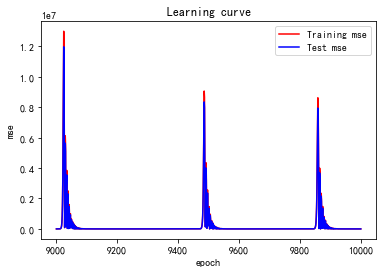

In [150]:
axis = [i for i in range(1, len(errors_train) + 1)]
last_epochs = len(axis)-1000
show_learning_curve(errors_train[last_epochs:], errors_test[last_epochs:], axis[last_epochs:])

In [190]:
def show_learning_curve(errors_train, errors_test, axis):
    figure = plt.figure()
    ax = figure.add_subplot(1, 1, 1)
    ax.plot(axis, errors_train, color="r", label="Training mse")
    ax.plot(axis, errors_test, color="b", label="Test mse")
    ax.set_xlabel("epoch")
    ax.set_ylabel("mse")
    ax.set_title("Learning curve")
    ax.legend()
    plt.show()

X_original = np.random.random((1000, 10)) * 10000
# Y_train = (2 * np.sum(X_train[:, :1], axis=1) + 3 * np.sum(X_train[:, 2:3], axis=1))[:, tf.newaxis]
# Y_train = np.sum(X_train[:, :5], axis=1)[:, tf.newaxis]
Y_train = X_original[:, :1] * X_original[:, 2:3] + X_original[:,4:5] / X_original[:,5:6]
poly = PolynomialFeatures(degree=2)
X_train = poly.fit_transform(X_original)
X_train = np.concatenate((X_train,1/(X_original+0.0001)),axis=1)

print(X_train.shape)
print(Y_train.shape)

alpha = 0
lr = linear_model.Lasso(alpha=alpha)
lr.fit(X_train, Y_train)
print("alpha: {}".format(alpha))
print("权重向量:\n%s\nbias: %.2f" % (lr.coef_, lr.intercept_))
# print(lr.predict(X_train))
# print(Y_train.flatten())
print("mse: %.2f" % np.mean((lr.predict(X_train) - Y_train.flatten()) ** 2))
print("预测性能得分: %.2f\n" % lr.score(X_train, Y_train))

(1000, 76)
(1000, 1)
alpha: 0
权重向量:
[ 0.00000000e+00 -1.62425021e-05  9.76895082e-04 -5.61320832e-04
  4.19882305e-06  2.63887365e-03  2.22551566e-03 -2.58608401e-05
  2.96842693e-04  4.97310435e-04  6.41357341e-04  9.76712899e-09
  1.07401961e-08  1.00000003e+00  6.47088627e-08 -2.18927212e-09
 -4.81589554e-08  6.57220622e-09 -6.97758450e-08 -4.24504458e-08
  5.05794931e-08 -3.99568811e-08  1.38728034e-08 -1.23335969e-08
 -2.92593472e-08 -3.57035563e-08 -4.69258268e-08  5.38512115e-09
 -5.03943662e-09  1.03755800e-08  2.78859705e-09  4.49550736e-08
  8.67760201e-08  1.24143720e-08 -1.05005836e-07 -2.84324361e-08
 -3.99949332e-08  8.07354507e-08  7.44117144e-08  1.00973560e-07
 -1.45452033e-07 -8.39592775e-08 -5.32999536e-08 -6.39541596e-08
  4.03386299e-08 -5.60400931e-09 -3.52625006e-07 -6.53238840e-08
 -6.01638655e-08 -2.29226435e-08 -1.73735176e-09  1.79339924e-08
  1.40541171e-07  7.00408642e-08  4.36694602e-08 -1.57383290e-07
 -7.42635660e-09  5.09837507e-08  1.08201735e-07 -3.33

D:\Anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:14: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
D:\Anaconda3\envs\ml\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
